# Fibonacci Fun Times!
---

In this notebook, we'll be exploring all kinds of fun stuff with the Fibonacci sequence (and extensions). If you're new to `.ipynb` notebooks, make sure you run *all* the cells to make sure you have all the tools you need in place.

Finally, the last couple of images in this file require the `mpmath` package to be installed (probably not default with your Python distribution).

In [20]:
# importing numpy for linear algebra operations, scipy for sparse matrices, pyplot for plotting
import numpy as np
from scipy.sparse import coo_matrix
import matplotlib.pyplot as plt

## Contents
---
[1 Problem description](#1-problem-description)  
[2 Linear recursion principles to the rescue!](#2-Linear-recursion-principles-to-the-rescue!)  
[3 Quadratic formula to the rescue!](#3-Quadratic-formula-to-the-rescue!)  
[4 The golden ratio](#4-The-golden-ratio)  
[5 Generalization of the Fibonacci formula](#5-Generalization-of-the-Fibonacci-formula)

## 1 Problem description
---
Most of us have run into the Fibonacci sequence *sometime* in our lives, whether as part of a math class, coding class, or coding interview:

$$\{f_n\} = 1, 1, 2, 3, 5, 8, 13, ...$$

In this sequence, after the first and second terms are both given value 1, the rest of the terms follow recursively as the sum of the previous two terms:

$$f_{n+1} = f_n + f_{n-1}$$

Now, writing some code to evaluate the $n^{th}$ term in the sequence isn't too bad if we're allowing $\mathcal{O}(n)$ solutions (where you need to painstakingly sum all the $n$ terms up to the one you want). But what if we *didn't* want to sum all those terms? What if we wanted an $\mathcal{O}(1)$ solution?

[Back to top](#Fibonacci-Fun-Times!)

## 2 Linear recursion principles to the rescue!
---
Let's look at that recursion relation again:

$$f_{n+1} = f_n + f_{n-1}$$

Now, this might seem kind of weird at first, but *what if* we could express each term in the above expression as a power of some unknown root we'll call $r$...what would our expression look like?

$$r^{n+1} = r^{n} + r^{n-1}$$

So how in the world do we know what $r$ is? Well, let's assume for a moment that $r \neq 0$ and we can divide both sides of the above expression by $r^{n-1}$:

$$ r^2 = r + 1 $$

Rearranging, we need to find values for $r$ that satisfy the relation

$$ r^2 - r - 1 = 0.$$

[Back to top](#Fibonacci-Fun-Times!)

## 3 Quadratic formula to the rescue!
---
As with the Fibonacci sequence - and whether or not we *enjoyed* it - we all also probably encountered the quadratic formula here or there during our math education. We were told (often without knowing *why*, depending on where, when, and by whom you were taught), that a quadratic equation of the form

$$ax^2 + bx + c = 0$$

with $a, b, c$ constants (and $a \neq 0$) has solutions $x_1, x_2$ of the form

$$ x_1, x_2 = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}.$$

But *why is this?* Well, every quadratic function $f(x) = ax^2 + bx + c$ has a certain symmetry to it, as we'll show with some examples below.

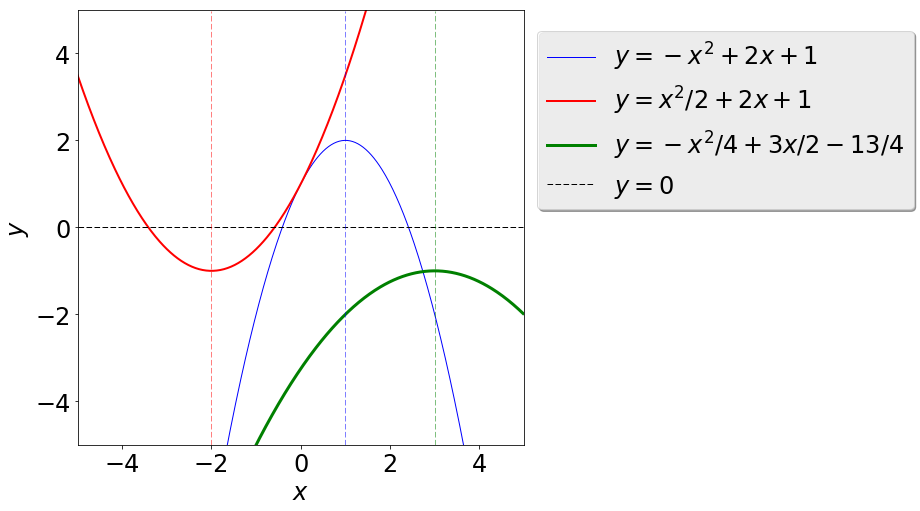

In [21]:
x = np.arange(-5, 5, 0.02)

# y1 = -(x-1)**2 + 2
y1 = -x**2 + 2*x + 1

# y2 = 1/2*((x+2)**2) - 1
y2 = x**2/2 + 2*x + 1

# -1/4*((x-3)**2) - 1
y3 = -1/4*x**2 + 3/2*x - 13/4

# zero baseline
y4 = 0*x

# symmetry lines
y1sym = np.arange(-5, 5, 0.02)
x1sym = 1*np.ones(500)

y2sym = np.arange(-5, 5, 0.02)
x2sym = -2*np.ones(500)

y3sym = np.arange(-5, 5, 0.02)
x3sym = 3*np.ones(500)

plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 24

lines = plt.plot(x, y1, x, y2, x, y3, x, y4, x1sym, y1sym, x2sym, y2sym, x3sym, y3sym)

plt.setp(lines[0], linewidth=1, color='b')
plt.setp(lines[4], linewidth=1/2, color='b', linestyle = '--')

plt.setp(lines[1], linewidth=2, color='r')
plt.setp(lines[5], linewidth=1/2, color='r', linestyle = '--')

plt.setp(lines[2], linewidth=3, color='g')
plt.setp(lines[6], linewidth=1/2, color='g', linestyle = '--')

plt.setp(lines[3], linewidth=1, color='k', linestyle = '--')


plt.legend(('$y = -x^2 + 2x + 1$', '$y = x^2/2 + 2x + 1$', '$y = -x^2/4 + 3x/2 - 13/4$', '$y=0$'),
           loc='upper right', bbox_to_anchor=(1.9, 0.98), fancybox=True, shadow=True)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('$x$')
plt.ylabel('$y$')
#plt.title('Quadratic functions (with lines of symmetry)')
plt.show()

[*Note how the third parabola doesn't have any* real *zeros*.]

To figure out where the line of symmetry is for an *arbitrary* quadratic expression $ax^2 + bx + c = 0$ (the $x$-es in that expression straddle the line of symmetry), we can do some 'mathemagic' with algebra. We're assuming $a \neq 0$, since if $a = 0$ our problem is linear and we've got no trouble solving it.

$$ ax^2 + bx + c = 0 $$

$$ x^2 + \frac{b}{a}x + \frac{c}{a} = 0 $$

$$ x^2 + \frac{b}{a}x + \frac{b^2}{4a^2} + \frac{c}{a} = \frac{b^2}{4a^2} $$

$$ \bigg(x + \frac{b}{2a}\bigg)^2 + \frac{c}{a} = \frac{b^2}{4a^2} $$

This is where the $x = -b/(2a)$ line of symmetry comes from. To get the zeros, we just have to rearrange the final expression a little bit.

$$ \bigg(x + \frac{b}{2a}\bigg)^2 = \frac{b^2}{4a^2} - \frac{c}{a} $$

$$ x + \frac{b}{2a} = \pm \sqrt{\frac{b^2}{4a^2} - \frac{c}{a}} $$

$$ x + \frac{b}{2a} = \pm \sqrt{\frac{b^2}{4a^2} - \frac{4ac}{4a^2}} $$

$$ x + \frac{b}{2a} = \pm \sqrt{\frac{b^2-4ac}{4a^2}} $$

$$ x + \frac{b}{2a} = \frac{\pm \sqrt{b^2-4ac}}{2a} $$

$$ x = \frac{-b \pm \sqrt{b^2-4ac}}{2a} $$

So the zeros of any of these parabolas are simply displaced (equally) from the $x = -b/2a$ line of symmetry by an amount that depends on their vertical displacement and how 'tightly bowed' they are (magnitude of $a$).

Finally, when the 'discriminant' $b^2 - 4ac$ is less than zero, we have a situation like the third parabola in the plot above (where no *real* zeros exist).

[Back to top](#Fibonacci-Fun-Times!)

## 4 The golden ratio
---
With the quadratic formula in hand, we can apply it to our still-unknown 'roots' of the Fibonacci sequence that satisfy

$$ r^2 - r - 1 = 0 $$

Here, we have $a = 1, b = -1, c = -1$, so our roots are:

$$ r_1, r_2 = \frac{1 \pm \sqrt{-(-1)-4(1)(-1)}}{2(1)} $$ or

$$ r_1, r_2 = \frac{1 \pm \sqrt{5}}{2}. $$

If we call $r_1$ the *positive* sum above, then it equals about $1.618$...the golden ratio! And here's an interesting fact: this means that $r_2$ is negative, and it is approximately $-0.618$, and is *exactly* equal to $1-r_1$ *and* $-1/r_1$.

Wild!

But let's move on to the linear algebra part of all this. Right now, we have *two* roots that *independently* satisfy the equation

$$ r^{n+1} = r^{n} + r^{n-1}. $$

Likewise, we can multiply any constants $c$ into the expression above without changing its truth.

$$ cr^{n+1} = cr^{n} + cr^{n-1} $$

So let's try and set up our Fibonacci sequence term definition ($f_n$) in the following way:

$$ f_n = c_1r_1^n + c_2r_2^n $$

If we know that $f_1 = 1$ and $f_2 = 1$, that gives us enough information to figure out what the constants are. In *fact*, we can make our life easier if we instead use $f_1$ and $f_2$ to 'back out' the fact that $f_0$ = 0, since, by rearrangement,

$$ f_{n-1} = f_{n+1} - f_{n}. $$

We can use the following two equations to find $c_1$ and $c_2$:

$$ f_0 = c_1r_1^0 + c_2r_2^0 = c_1 + c_2 = 0 $$

$$ f_1 = c_1r_1^1 + c_2r_2^1 = 1 $$

There's a convenient matrix representation we can use for this relationship:

$$
\left[
    \begin{array}{rrr}
      1 & 1 \\
      r_1 & r_2
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      c_1\\c_2
    \end{array}
  \right]=
  \left[
    \begin{array}{l}
      0\\1
    \end{array}
  \right]
$$

If we multiply the bottom equation by $1/r_1$, we get

$$
\left[
    \begin{array}{rrr}
      1 & 1 \\
      1 & r_2/r_1
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      c_1\\c_2
    \end{array}
  \right]=
  \left[
    \begin{array}{rrr}
      1 & 1 \\
      1 & -r_1^{-2}
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      c_1\\c_2
    \end{array}
  \right]=
  \left[
    \begin{array}{l}
      0\\r_1^{-1}
    \end{array}
  \right].
$$

Subtracting the first equation from the second equation (and doing a little rearranging), we have

$$
\left[
    \begin{array}{rrr}
      1 & 1 \\
      0 & (r_2-r_1)
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      c_1\\c_2
    \end{array}
  \right]=
  \left[
    \begin{array}{l}
      0\\1
    \end{array}
  \right].
$$

By scaling the second equation, we get

$$
\left[
    \begin{array}{rrr}
      1 & 1 \\
      0 & 1
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      c_1\\c_2
    \end{array}
  \right]=
  \left[
    \begin{array}{l}
      0\\(r_2-r_1)^{-1}
    \end{array}
  \right].
$$

Finally, we end up with the following solution:

$$
\left[
    \begin{array}{rrr}
      1 & 0 \\
      0 & 1
    \end{array}
  \right]
  \left[
    \begin{array}{l}
      c_1\\c_2
    \end{array}
  \right]=
  \left[
    \begin{array}{l}
      (r_1-r_2)^{-1}\\(r_2-r_1)^{-1}
    \end{array}
  \right]=
  \left[
    \begin{array}{l}
      (r_1+1/r_1)^{-1}\\-(r_1+1/r_1)^{-1}
    \end{array}
  \right].
$$

And at last, we have all unknowns defined in our closed-form expression:

$$ f_n = c_1r_1^n + c_2r_2^n $$

Let's give that expression a spin!

In [22]:
def closedFibonacci(n):
    """Returns the nth Fibonacci term for whole numbers n (floating point approximation)."""
    r1 = (1+5**0.5)/2
    r2 = -1/r1

    c1 = 1/(r1-r2)
    c2 = 1/(r2-r1)
    return c1*r1**n + c2*r2**n

for n in range(0,9):
    fibNum = closedFibonacci(n)
    print('For n={}, the Fibonacci term is {}'.format(n,fibNum))

For n=0, the Fibonacci term is 0.0
For n=1, the Fibonacci term is 1.0
For n=2, the Fibonacci term is 0.9999999999999999
For n=3, the Fibonacci term is 2.0
For n=4, the Fibonacci term is 3.0000000000000004
For n=5, the Fibonacci term is 5.000000000000001
For n=6, the Fibonacci term is 8.000000000000002
For n=7, the Fibonacci term is 13.000000000000004
For n=8, the Fibonacci term is 21.000000000000004


[Back to top](#Fibonacci-Fun-Times!)

## 5 Generalization of the Fibonacci formula
---
The formula above works to compute a Fibonacci sequence term for arbitrary *integer* values $n$, but there's an ambiguity present when we start to talk about *fractional* values of $n$. For instance, if we ask what `closedFibonacci(1.5)` is, it's easy enough to evaluate a fractional power of $r_1$ (the golden ratio), but $r_2$ is a *negative* number that's a little harder to deal with (and *can* still get ambiguous, even if we know our way around complex numbers).

What we can do, though, is define the negativity of $r_2$ (experienced at odd powers of $n$) via a trigonometric function like so:

$$ f_n = c_1r_1^n + \cos(\pi n)r_1^{-n} $$

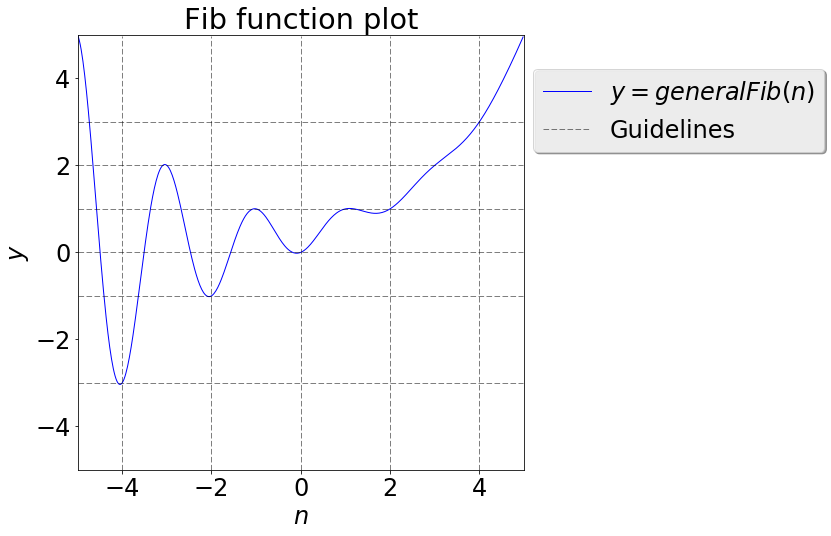

In [23]:
def generalFibonacci(n):
    """Returns an nth (generalized) Fibonacci term for real numbers n (floating point approximation)."""
    r1 = (1+5**0.5)/2
    r2 = -1/r1

    c1 = 1/(r1-r2)
    c2 = 1/(r2-r1)
    return c1*r1**n + c2*np.cos(np.pi*n)*(1/r1)**n

n = np.arange(-5, 5, 0.02)

y1 = generalFibonacci(n)
y2 = -3*np.ones(500)
y3 = -1*np.ones(500)
y4 = 0*np.ones(500)
y5 = 1*np.ones(500)
y6 = 2*np.ones(500)
y7 = 3*np.ones(500)

yVert = np.arange(-5, 5, 0.02)

nVert1 = -4*np.ones(500)
nVert2 = -2*np.ones(500)
nVert3 = 0*np.ones(500)
nVert4 = 2*np.ones(500)
nVert5 = 4*np.ones(500)

plt.figure(figsize=(8,8))
plt.rcParams['font.size'] = 24

lines = plt.plot(n, y1, n, y2, n, y3, n, y4, n, y5, n, y6, n, y7, \
                nVert1, yVert, nVert2, yVert, nVert3, yVert, nVert4, yVert, nVert5, yVert)

plt.setp(lines[0], linewidth=1, color='b')
for ind in range(1,12):
    plt.setp(lines[ind], linewidth=1/2, color='k', linestyle='--')

plt.legend(('$y = generalFib(n)$', 'Guidelines'),
           loc='upper right', bbox_to_anchor=(1.7, 0.95), fancybox=True, shadow=True)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('Fib function plot')
plt.xlabel('$n$')
plt.ylabel('$y$')
plt.show()

If we want to go *real* nuts, we realize there are even further generalizations than *this*! For example:

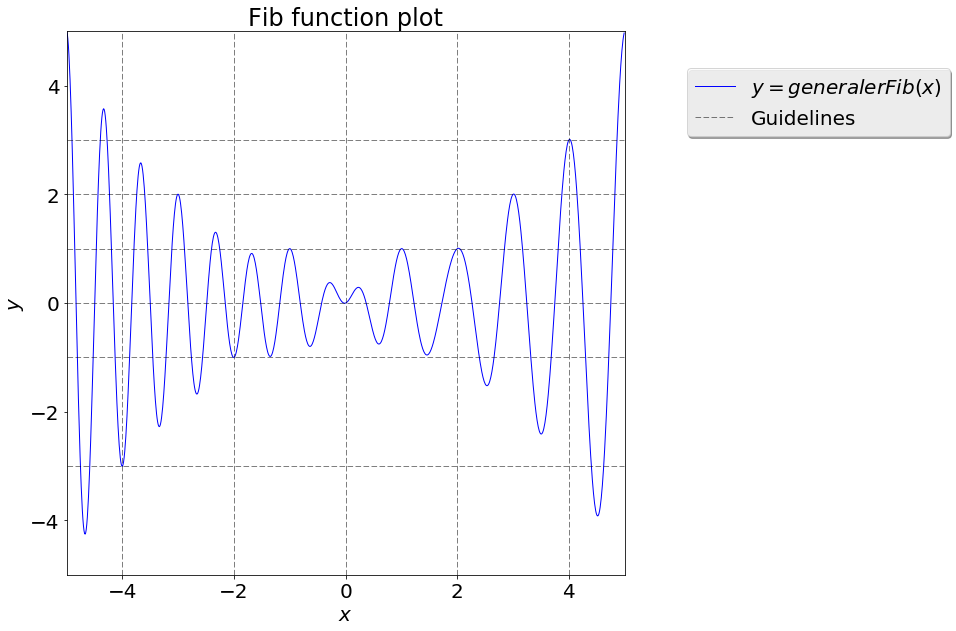

In [24]:
def generalerFibonacci(n, goldenMode, invGoldenMode):
    """Returns an nth (generalized) Fibonacci term for real numbers n (floating point approximation), given an even integer goldenMode and odd integer invGoldenMode."""
    r1 = (1+5**0.5)/2
    r2 = -1/r1

    c1 = 1/(r1-r2)
    c2 = 1/(r2-r1)
    return c1*np.cos(goldenMode*np.pi*n)*r1**n + c2*np.cos(invGoldenMode*np.pi*n)*(1/r1)**n

x = np.arange(-5, 5, 0.01)
numPoints = 1000
goldenMode = 2
invGoldenMode = 3

y1 = generalerFibonacci(x, goldenMode, invGoldenMode)
y2 = -3*np.ones(numPoints)
y3 = -1*np.ones(numPoints)
y4 = 0*np.ones(numPoints)
y5 = 1*np.ones(numPoints)
y6 = 2*np.ones(numPoints)
y7 = 3*np.ones(numPoints)

yVert = np.arange(-5, 5, 0.01)

xVert1 = -4*np.ones(numPoints)
xVert2 = -2*np.ones(numPoints)
xVert3 = 0*np.ones(numPoints)
xVert4 = 2*np.ones(numPoints)
xVert5 = 4*np.ones(numPoints)

plt.figure(figsize=(10,10))
plt.rcParams['font.size'] = 20

lines = plt.plot(x, y1, x, y2, x, y3, x, y4, x, y5, x, y6, x, y7, \
                xVert1, yVert, xVert2, yVert, xVert3, yVert, xVert4, yVert, xVert5, yVert)

plt.setp(lines[0], linewidth=1, color='b')
for ind in range(1,12):
    plt.setp(lines[ind], linewidth=1/2, color='k', linestyle='--')

plt.legend(('$y = generalerFib(x)$', 'Guidelines'),
           loc='upper right', bbox_to_anchor=(1.6, 0.95), fancybox=True, shadow=True)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title('Fib function plot')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

As a last exploration, we'll return to the first generalized Fibonacci function (with just the *one* cosine function) and take a look at a `cplot` (a way of visualizing complex-valued data) of that function evaluated over a range of values in the complex plane (not just for real numbers anymore!). Below, you'll see zeros as a convergence of many different colors (arguments of the complex value) at a single point. Neato, right?

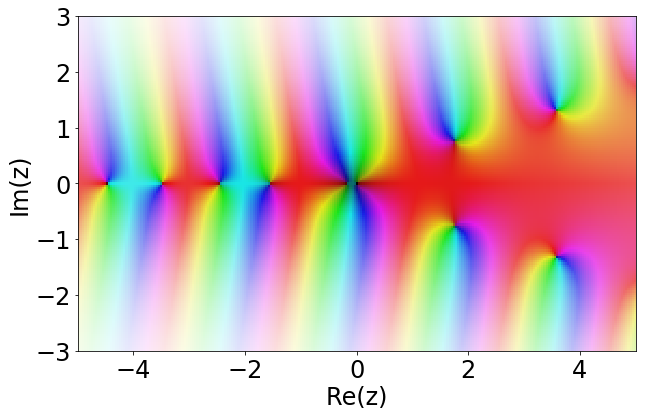

In [25]:
# Note: for this section to run correctly, you'll need to install the mpmath package (probably not default
#       with most Python distributions)
import mpmath

def generalFibonacciCx(z):
    """Returns an nth (generalized) Fibonacci term for real numbers n (floating point approximation)."""
    r1 = (1+5**0.5)/2
    r2 = -1/r1

    c1 = 1/(r1-r2)
    c2 = 1/(r2-r1)
    return c1*r1**z + c2*mpmath.cos(np.pi*z)*(1/r1)**z

plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['font.size'] = 24
mpmath.cplot(generalFibonacciCx, [-5, 5], [-3, 3], points=40000)

I think the pattern of zeros seen above is pretty neat. There are functions out there whose mysterious zeros have yet to be fully explained. For instance, there's a million-dollar prize (and instant fame!) waiting if you can fully characterize the cryptic zeros rising up along the line $\Re(z) = 1/2$ in the following plot of the Riemann zeta function $\zeta(z)$.

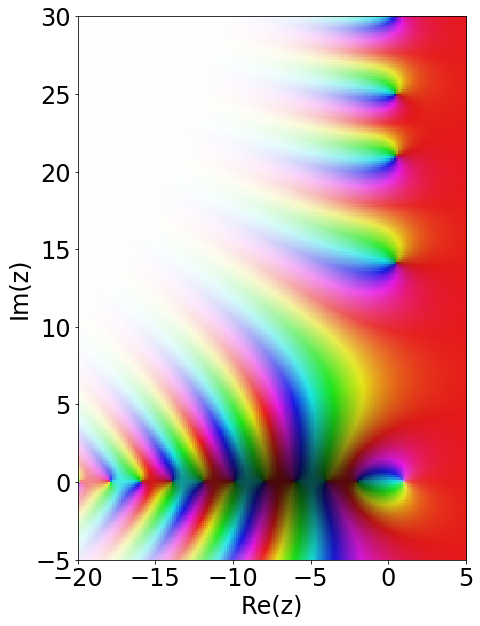

In [26]:
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['font.size'] = 24
mpmath.cplot(mpmath.zeta, [-20, 5], [-5, 30], points=40000, dpi=100)

[Back to top](#Fibonacci-Fun-Times!)